# Visualizzare dati geospaziali


**obiettivi**
- disegnare una mappa con matplotlib
- rappresentare punti
- mappe coropletiche

**dati**
- ISTAT
- [Inside Airbnb](http://insideairbnb.com/venice)

**requisiti**
- conoscenza di geopandas

**suggerimenti**<br/>
seguire l'hashtag Twitter [#30DayMapChallege](https://twitter.com/hashtag/30DayMapChallenge)

**status**<br/>
"la mappa non è il territorio"

In [1]:
library(sf)
library(ggplot2)
library(readr)
library(ggspatial)
#install.packages("ggspatial")
#install.packages("prettymapr")
#install.packages("plotly")
options(viewer = NULL)  # Disabilita l'uso di plotly come visualizzatore


# URL del dataset Airbnb
airbnb_venezia_url <- "http://data.insideairbnb.com/italy/veneto/venice/2023-12-12/data/listings.csv.gz"

# Leggere i dati CSV compressi
airbnb_venezia <- read_csv(airbnb_venezia_url,show_col_types = FALSE)


Linking to GEOS 3.12.1, GDAL 3.9.1, PROJ 9.4.1; sf_use_s2() is TRUE



In [2]:
# Creare una geometria sf a partire da latitudine e longitudine
geo_airbnb_venezia <- st_as_sf(
  airbnb_venezia,
  coords = c("longitude", "latitude"),
  crs = 4326
)

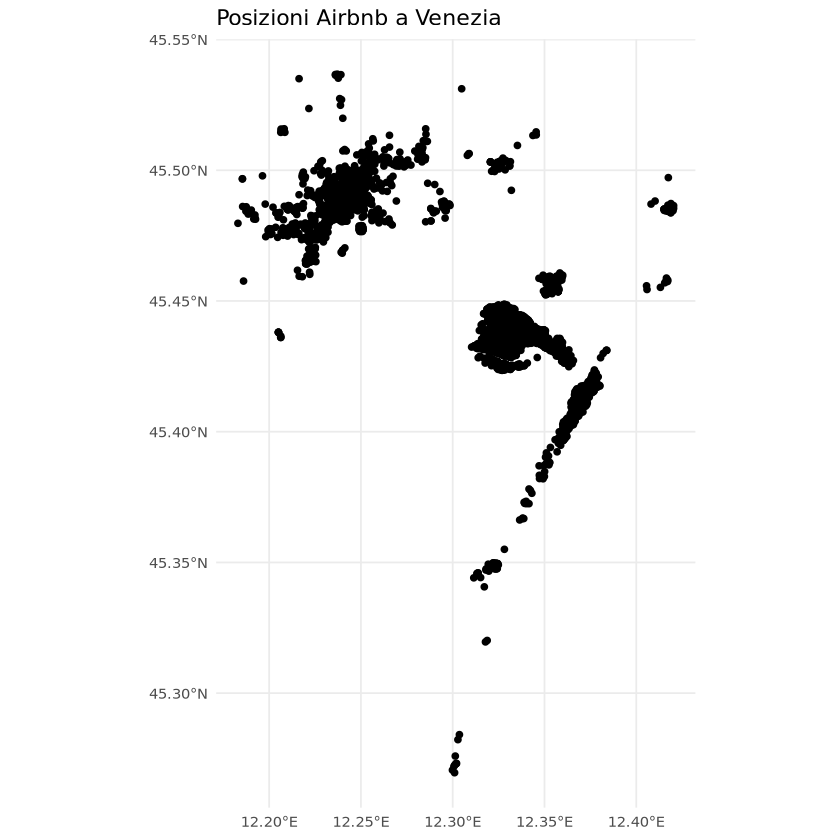

In [3]:
# Plot semplice
ggplot(geo_airbnb_venezia) +
  geom_sf() +
  theme_minimal() +
  ggtitle("Posizioni Airbnb a Venezia")


scegliere i [colori](https://r-graph-gallery.com/ggplot2-color.html)

![](https://r-graph-gallery.com/img/graph/42-colors-names.png)

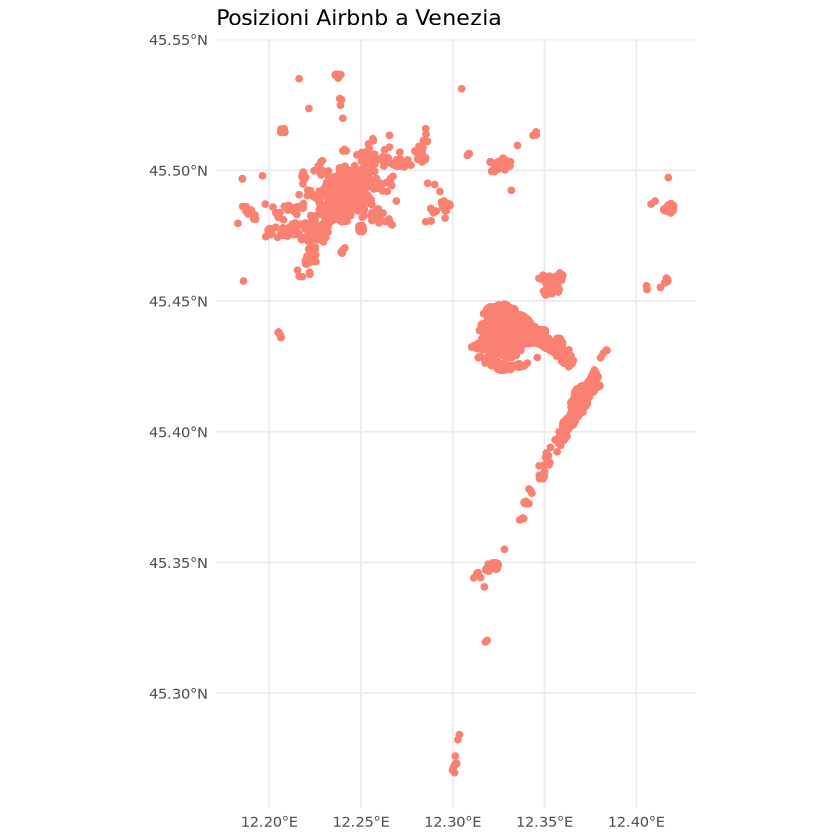

In [4]:

# Plot con colore personalizzato
ggplot(geo_airbnb_venezia) +
  geom_sf(color = "salmon") +
  theme_minimal() +
  ggtitle("Posizioni Airbnb a Venezia")


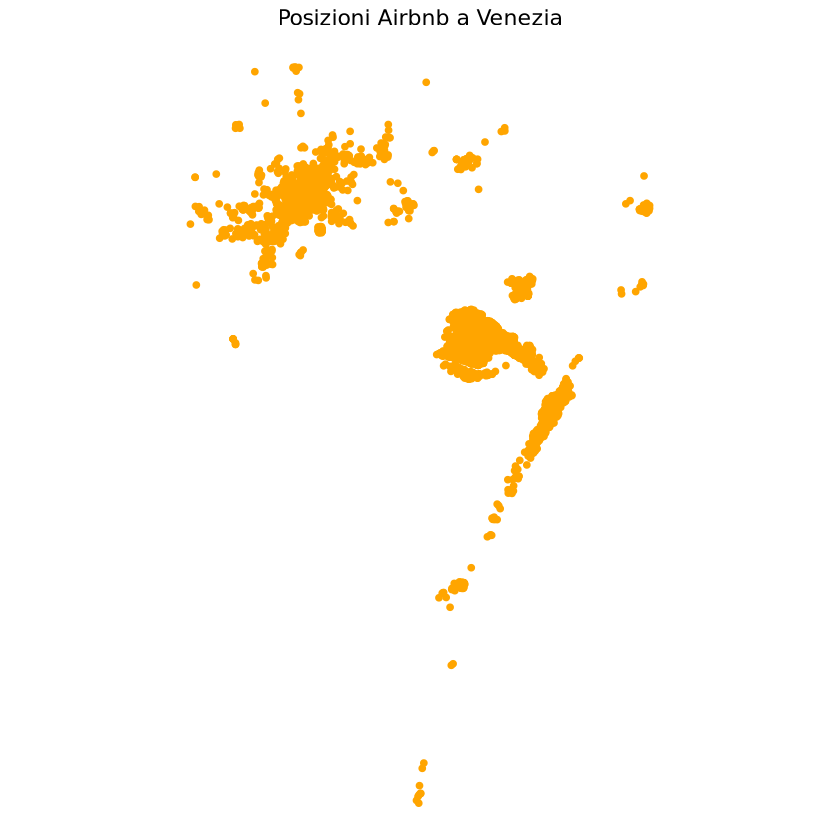

In [5]:
# Plot con colore e titolo personalizzati
ggplot(geo_airbnb_venezia) +
  geom_sf(color = "orange") +
  theme_void() + # Nasconde gli assi
  ggtitle("Posizioni Airbnb a Venezia") +
  theme(plot.title = element_text(hjust = 0.5))


# aggiungere mappe di sfondo

[Tile Map Service](https://wiki.osgeo.org/wiki/Tile_Map_Service_Specification)


<img src="https://opengeospatial.github.io/e-learning/images/pyramid2.png" width=500px />

Schema supportato

*http://{**s**}.**dominio.com**/{**z**}/{**x**}/{**y**}.png*

- **s** => sottodominio (se sono disponibili più di un server tms - solitamente a.dominio.com b.dominio.com ...)
- **dominio.com** => il dominio (es. openstreetmap.org)
- **z** => livello di zoom
- **x** =>  colonna
- **y** => riga

Es:<br/>
&nbsp;&nbsp;&nbsp;https://tile.openstreetmap.org/18/139191/93190.png

![](https://tile.openstreetmap.org/18/139191/93190.png)


Zoom: 10



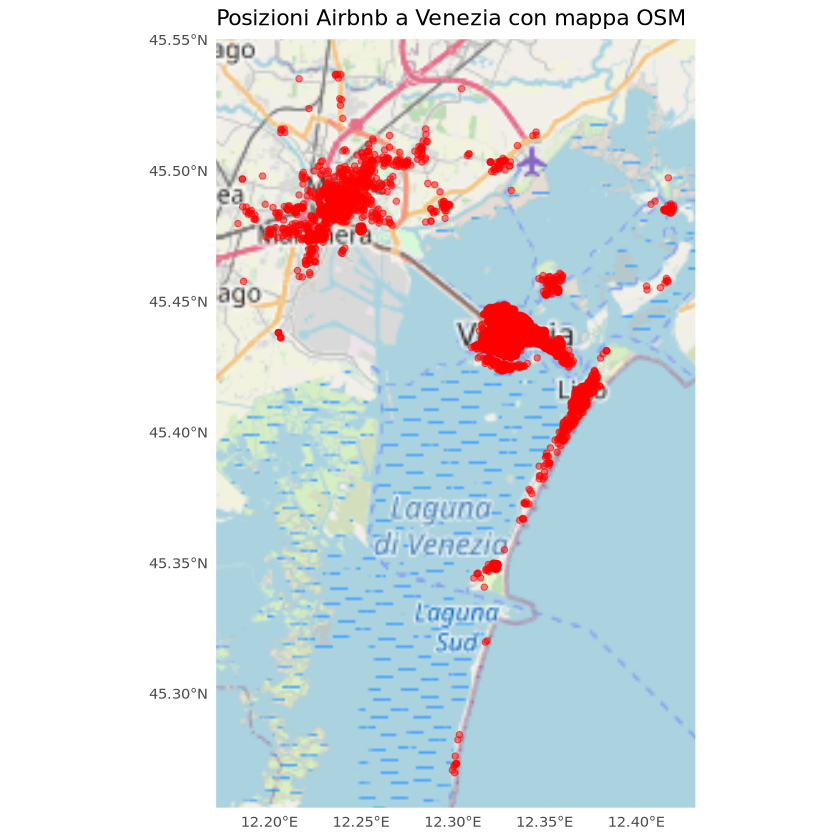

In [6]:
# Creare il plot con una mappa di base (OpenStreetMap)
ggplot() +
  annotation_map_tile("https://tile.openstreetmap.org/${z}/${x}/${y}.png") + # URL corretto
  geom_sf(data = geo_airbnb_venezia, color = "red", alpha = 0.5) +
  theme_minimal() +
  ggtitle("Posizioni Airbnb a Venezia con mappa OSM")


Zoom: 10



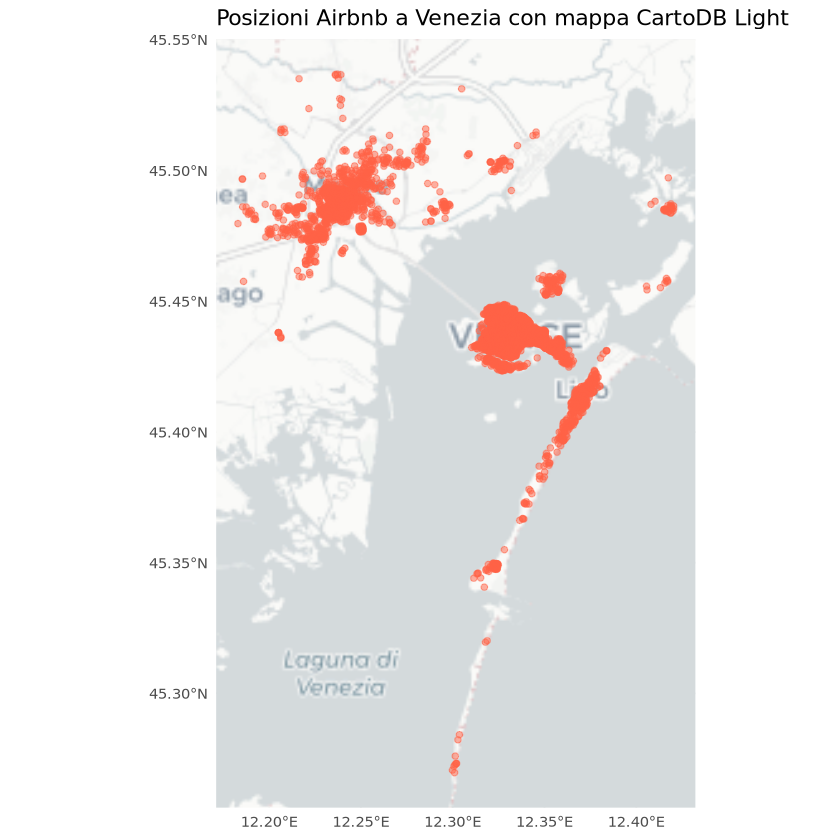

In [7]:
osm_light <- "https://cartodb-basemaps-a.global.ssl.fastly.net/light_all/${z}/${x}/${y}.png"

ggplot() +
  annotation_map_tile(osm_light, zoom = 10) + # Rimuovi `${s}`
  geom_sf(data = geo_airbnb_venezia, color = "tomato", alpha = 0.5) +
  theme_minimal() +
  ggtitle("Posizioni Airbnb a Venezia con mappa CartoDB Light")


## WGS 84 / Pseudo-Mercator
*Spherical Mercator, Google Maps, OpenStreetMap, Bing, ArcGIS, ESRI*

[EPSG:3857](http://epsg.io/3857)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Tissot_mercator.png/600px-Tissot_mercator.png)

Variazione con la latitudine delle distanze rappresentate (in gradi o pixel) sulla proiezione di Mercatore rispetto alle distanze effettive (in metri) sulla superficie terrestre.

https://wiki.openstreetmap.org/wiki/Zoom_levels


<table>
  <thead>
    <tr>
      <th>Livello</th>
      <th># Tile</th>
      <th>Dimensione Tile (° of longitude)</th>
      <th>m / pixel (sull'Equatore)</th>
      <th>~ Scala (sullo schermo)</th>
      <th>Esempio di area da rappresentare</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>1</td>
      <td>360</td>
      <td>156,412</td>
      <td>1:500 milioni</td>
      <td>mondo intero</td>
    </tr>
    <tr>
      <td>1</td>
      <td>4</td>
      <td>180</td>
      <td>78.206</td>
      <td>1:250 milioni</td>
      <td></td>
    </tr>
    <tr>
      <td>2</td>
      <td>16</td>
      <td>90</td>
      <td>39.103</td>
      <td>1:150 milioni</td>
      <td>area subcontinentale</td>
    </tr>
    <tr>
      <td>3</td>
      <td>64</td>
      <td>45</td>
      <td>19.551</td>
      <td>1:70 milioni</td>
      <td>paesi più grandi</td>
    </tr>
    <tr>
      <td>4</td>
      <td>256</td>
      <td>22.5</td>
      <td>9.776</td>
      <td>1:35 milioni</td>
      <td></td>
    </tr>
    <tr>
      <td>5</td>
      <td>1,024</td>
      <td>11.25</td>
      <td>4.888</td>
      <td>1:15 milioni</td>
      <td>grande paese africano</td>
    </tr>
    <tr>
      <td>6</td>
      <td>4,096</td>
      <td>5.625</td>
      <td>2.444</td>
      <td>1:10 milioni</td>
      <td>grande paese europeo</td>
    </tr>
    <tr>
      <td>7</td>
      <td>16,384</td>
      <td>2.813</td>
      <td>1.222</td>
      <td>1:4 milioni</td>
      <td>piccolo paese, stato USA</td>
    </tr>
    <tr>
      <td>8</td>
      <td>65,536</td>
      <td>1.406</td>
      <td>610.984</td>
      <td>1:2 milioni</td>
      <td></td>
    </tr>
    <tr>
      <td>9</td>
      <td>262,144</td>
      <td>0.703</td>
      <td>305.492</td>
      <td>1:1 milione</td>
      <td>vasta area, larga area metropolitana</td>
    </tr>
    <tr>
      <td>10</td>
      <td>1,048,576</td>
      <td>0.352</td>
      <td>152.746</td>
      <td>1:500 mila</td>
      <td>area metropolitana</td>
    </tr>
    <tr>
      <td>11</td>
      <td>4,194,304</td>
      <td>0.176</td>
      <td>76.373</td>
      <td>1:250 mila</td>
      <td>città</td>
    </tr>
    <tr>
      <td>12</td>
      <td>16,777,216</td>
      <td>0.088</td>
      <td>38.187</td>
      <td>1:150 mila</td>
      <td>città o quartiere cittadino</td>
    </tr>
    <tr>
      <td>13</td>
      <td>67,108,864</td>
      <td>0.044</td>
      <td>19.093</td>
      <td>1:70 mila</td>
      <td>villaggio, o sobborgo</td>
    </tr>
    <tr>
      <td>14</td>
      <td>268,435,456</td>
      <td>0.022</td>
      <td>9.547</td>
      <td>1:35 mila</td>
      <td></td>
    </tr>
    <tr>
      <td>15</td>
      <td>1,073,741,824</td>
      <td>0.011</td>
      <td>4.773</td>
      <td>1:15 mila</td>
      <td>quartiere, strade</td>
    </tr>
    <tr>
      <td>16</td>
      <td>4,294,967,296</td>
      <td>0.005</td>
      <td>2.387</td>
      <td>1:8 mila</td>
      <td>strade</td>
    </tr>
    <tr>
      <td>17</td>
      <td>17,179,869,184</td>
      <td>0.003</td>
      <td>1.193</td>
      <td>1:4 mila</td>
      <td>blocco, parco, indirizzi</td>
    </tr>
    <tr>
      <td>18</td>
      <td>68,719,476,736</td>
      <td>0.001</td>
      <td>0.596</td>
      <td>1:2 mila</td>
      <td>alcuni edifici, alberi</td>
    </tr>
    <tr>
      <td>19</td>
      <td>274,877,906,944</td>
      <td>0.0005</td>
      <td>0.298</td>
      <td>1:1 mila</td>
      <td>dettagli sulle strade locali e sugli incroci</td>
    </tr>
    <tr>
      <td>20</td>
      <td>1,099,511,627,776</td>
      <td>0.00025</td>
      <td>0.149</td>
      <td>1:500</td>
      <td>un edificio di medie dimensioni</td>
    </tr>
  </tbody>
</table>


In [8]:
ggsave("venezia_airbnb.pdf", width = 10, height = 7, dpi = 300)


Zoom: 10



# visualizzazione a punti

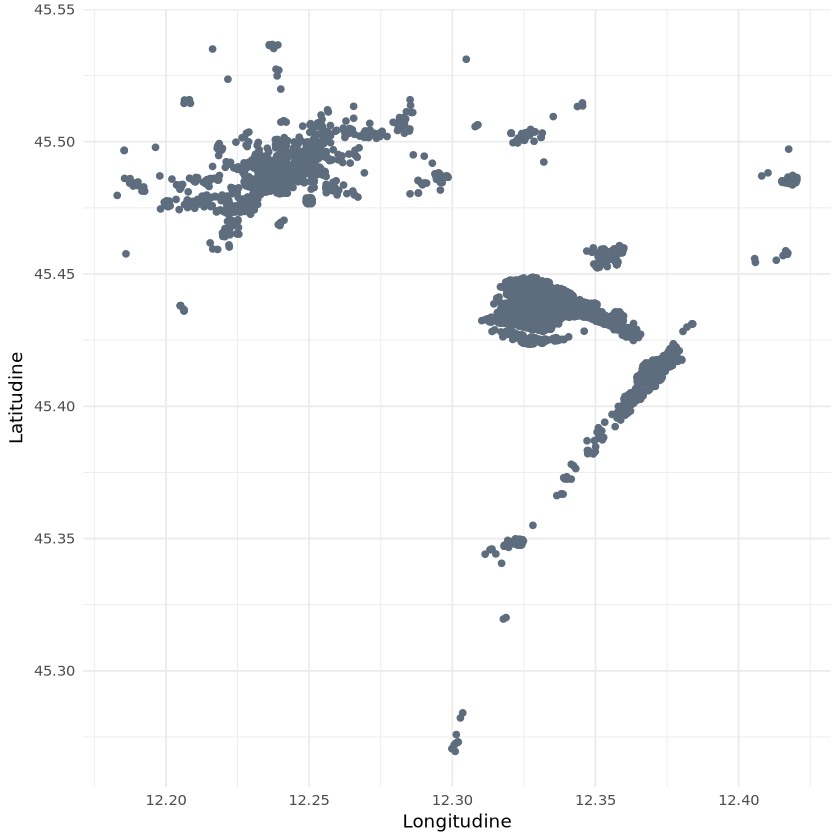

In [9]:
# Supponiamo che geo_airbnb_venezia sia un oggetto sf (Simple Features)
# Converti le coordinate in EPSG:4326 (WGS84)
geo_airbnb_venezia <- st_transform(geo_airbnb_venezia, 4326)

# Estrai le coordinate longitudine (lng) e latitudine (lat)
geo_airbnb_venezia$lng <- st_coordinates(geo_airbnb_venezia)[, 1]
geo_airbnb_venezia$lat <- st_coordinates(geo_airbnb_venezia)[, 2]

# Crea un joint plot con ggplot2
ggplot(geo_airbnb_venezia, aes(x = lng, y = lat)) +
  geom_point(color = "#5D6D7E") +  # Colore simile a "xkcd:dusky blue"
  theme_minimal() +
  labs(x = "Longitudine", y = "Latitudine")

creare un grafico a dispersione (scatterplot) per conoscere le distribuzioni spaziali


In [10]:
install.packages("ggExtra")

also installing the dependencies ‘colourpicker’, ‘shinyjs’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



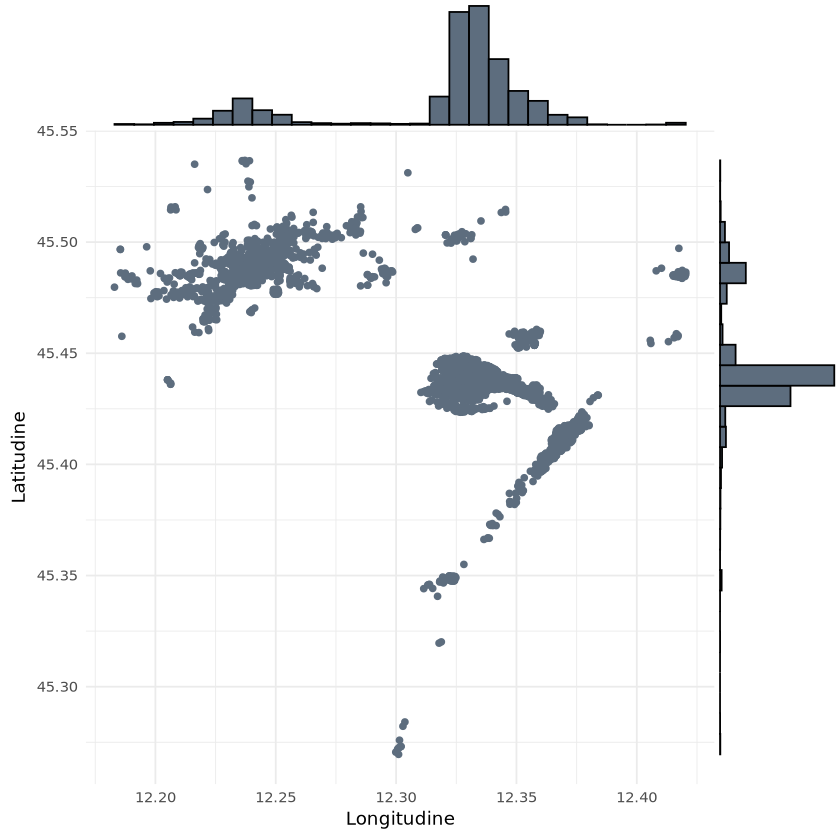

In [11]:
# Aggiungi ggExtra per i grafici marginali
library(ggExtra)

# Crea il grafico base
p <- ggplot(geo_airbnb_venezia, aes(x = lng, y = lat)) +
  geom_point(color = "#5D6D7E") +
  theme_minimal() +
  labs(x = "Longitudine", y = "Latitudine")

# Aggiungi le distribuzioni marginali
ggMarginal(p, type = "histogram", fill = "#5D6D7E")

### visualizzazione con esagoni

Una buona alternativa per capire dov'è la concentrazione dei punti in alcune zone è quella di utilizzare una griglia esagonale utilizzando colori diversi

L'uso del raggruppamento esagonale (a volte chiamato hexbin) ha proprietà migliori rispetto alle griglie quadrate, come una maggiore flessibilità nella forma e una migliore connettività tra le celle.

In [12]:
install.packages('hexbin')
library(hexbin)


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Zoom: 10



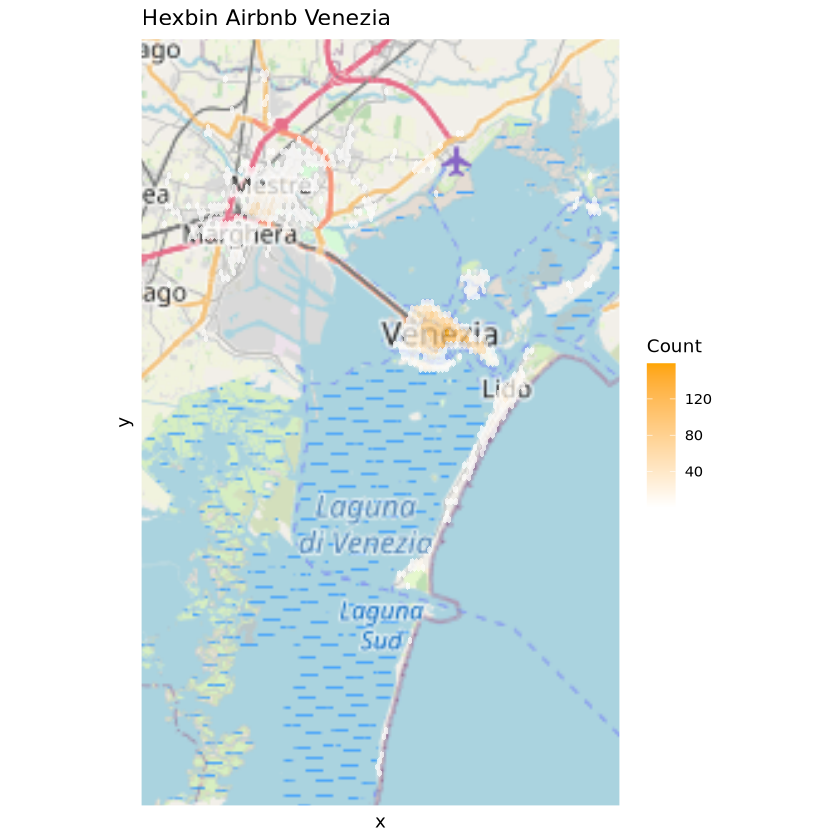

In [13]:
# Trasformare le coordinate in EPSG:3857
geo_airbnb_venezia_3857 <- st_transform(geo_airbnb_venezia, crs = 3857)

# Estrarre le coordinate x e y
geo_airbnb_venezia_3857$x <- st_coordinates(geo_airbnb_venezia_3857)[, 1]
geo_airbnb_venezia_3857$y <- st_coordinates(geo_airbnb_venezia_3857)[, 2]

# Calcolare il bounding box
bounding_box <- st_bbox(geo_airbnb_venezia_3857)

# Convertire il bounding box in un dataframe per ggplot2
bbox_df <- data.frame(
  xmin = bounding_box["xmin"],
  ymin = bounding_box["ymin"],
  xmax = bounding_box["xmax"],
  ymax = bounding_box["ymax"]
)

# Creare un hexbins plot
ggplot() +
  annotation_map_tile("https://tile.openstreetmap.org/${z}/${x}/${y}.png") + # Aggiungi la mappa di base
  stat_binhex(data = geo_airbnb_venezia_3857,
              aes(x = x, y = y, fill = after_stat(count)), 
              bins = 100, alpha = 0.7, color = NA) + # Hexbin
  scale_fill_gradient(low = "white", high = "orange", name = "Count") + # Gradazione di colore
  coord_sf(xlim = c(bounding_box["xmin"], bounding_box["xmax"]),
           ylim = c(bounding_box["ymin"], bounding_box["ymax"])) + # Limitare la vista
  theme_minimal() +
  theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank()) + # Rimuovere gli assi
  ggtitle("Hexbin Airbnb Venezia")


In [14]:
ggsave("venezia_airbnb_hexbin.png", width = 10, height = 7, dpi = 300)


Zoom: 10



## Rappresentazione a densità 

Zoom: 10



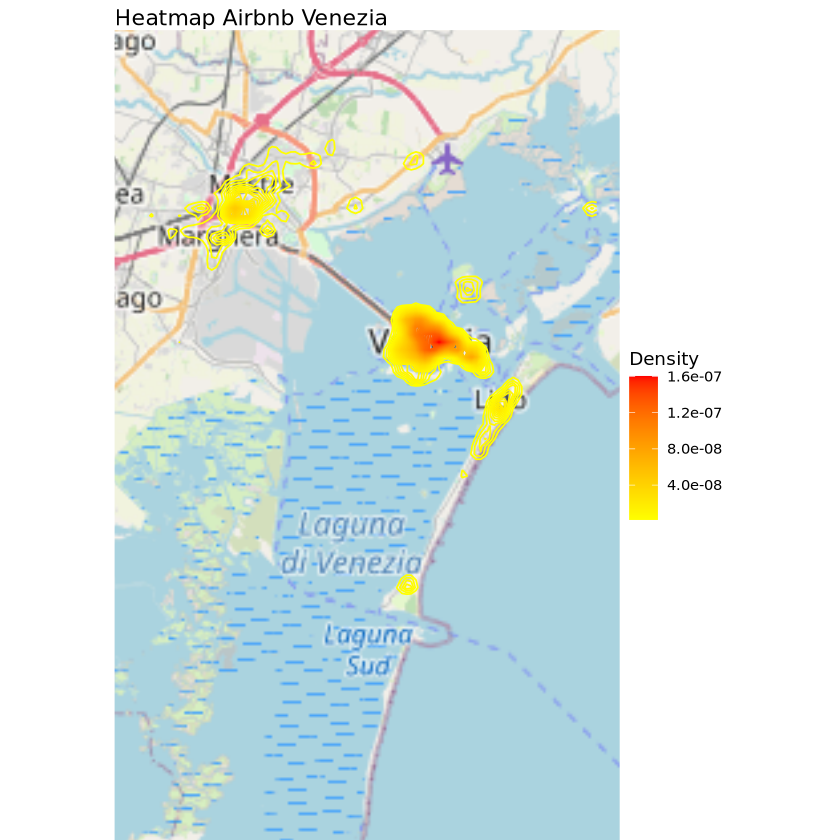

In [15]:
ggplot() +
  annotation_map_tile("https://tile.openstreetmap.org/${z}/${x}/${y}.png") + # Mappa di base
  stat_density_2d(
    data = geo_airbnb_venezia_3857,
    aes(x = x, y = y, color = after_stat(level)), # Colorare i contorni
    geom = "contour", linewidth = 0.5, bins = 100 # Linee sottili con linewidth
  ) +
  scale_color_gradient(low = "yellow", high = "red", name = "Density") + # Gradiente colore per le linee
  coord_sf(
    xlim = c(bounding_box["xmin"], bounding_box["xmax"]),
    ylim = c(bounding_box["ymin"], bounding_box["ymax"])
  ) +
  theme_void() + # Rimuovere assi
  ggtitle("Heatmap Airbnb Venezia")


In [16]:
ggsave("venezia_airbnb_density.png", width = 10, height = 7, dpi = 300)


Zoom: 10



### rappresentazione a cluster

un altro modo per capire meglio dove si trova la concentrazione principale dei punti è l'uso dei cluster

Un algoritmo comune per identificare gruppi di punti, in base alla loro densità nello spazio, è [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN) - Raggruppamento spaziale di applicazioni con rumore basato sulla densità.<br/>
Per questo metodo, un cluster è una concentrazione di almeno *m* punti, ciascuno dei quali entro una distanza di *r* da almeno un altro punto del cluster.



In [32]:
library("dbscan")


In [33]:
# Parametri per DBSCAN
eps <- 150  # Distanza massima tra punti nel cluster
minp <- 5   # Numero minimo di punti in un cluster

# Trasformare le coordinate in EPSG:3857
geo_airbnb_venezia_3857 <- st_transform(geo_airbnb_venezia, crs = 3857)

# Estrarre le coordinate x e y
coords <- st_coordinates(geo_airbnb_venezia_3857)
x <- coords[, 1]
y <- coords[, 2]


In [34]:
# Applicare DBSCAN
db <- dbscan(cbind(x, y), eps = eps, minPts = minp)

# Aggiungere i cluster al dataframe
geo_airbnb_venezia_3857$cluster <- as.factor(db$cluster) # I cluster sono numerati, -1 è il rumore

# Separare i punti di rumore e i cluster
noise <- geo_airbnb_venezia_3857[geo_airbnb_venezia_3857$cluster == "-1", ]
clusters <- geo_airbnb_venezia_3857[geo_airbnb_venezia_3857$cluster != "-1", ]


In [35]:
head(clusters,3)

id    listing_url                        scrape_id    last_scraped
1  6623 https://www.airbnb.com/rooms/6623  2.023121e+13 2023-12-12  
2  6624 https://www.airbnb.com/rooms/6624  2.023121e+13 2023-12-12  
3 12074 https://www.airbnb.com/rooms/12074 2.023121e+13 2023-12-12  
  source      name                                                         
1 city scrape Rental unit in Venice · ★4.94 · 2 bedrooms · 4 beds · 2 baths
2 city scrape Rental unit in Venice · ★4.98 · 2 bedrooms · 6 beds · 2 baths
3 city scrape Rental unit in Venice · ★4.94 · 2 bedrooms · 4 beds · 2 baths
  description
1 NA         
2 NA         
3 NA         
  neighborhood_overview                                                                                                                                                                                                                                                                              
1 Close by is the Frari Church (known as Tiziano’s church) and the area is beautifully quiet, with – for Venice – a rare feeling of space. <br />It’s very central here, yet quiet. The street leads to San Stae vaporetto stop so there’s no through traffic, and the Rialto is only 7 minutes away.
2 We are in the middle of a residential area called San Polo, just off Rialto bridge. Our neighborhood is far more "venetian" than San Marco with all its tourists jams.                                                                                                                             
3 There are plenty of bars, restaurants and pizzeria. You can enjoy lots of small shops, trendy cafés                                                                                                                                                                                                
  picture_url                                                     host_id
1 https://a0.muscache.com/pictures/492258/834683b6_original.jpg   15016  
2 https://a0.muscache.com/pictures/65440024/a5646008_original.jpg 15016  
3 https://a0.muscache.com/pictures/11646330/65e764d2_original.jpg 15016  
  geometry                ⋯ instant_bookable calculated_host_listings_count
1 POINT (1372279 5690768) ⋯ FALSE            3                             
2 POINT (1372275 5691022) ⋯ FALSE            3                             
3 POINT (1372536 5690894) ⋯ FALSE            3                             
  calculated_host_listings_count_entire_homes
1 3                                          
2 3                                          
3 3                                          
  calculated_host_listings_count_private_rooms
1 0                                           
2 0                                           
3 0                                           
  calculated_host_listings_count_shared_rooms reviews_per_month
1 0                                           1.08             
2 0                                           0.59             
3 0                                           1.21             
  geometry                lng      lat      cluster
1 POINT (1372279 5690768) 12.32739 45.43817 1      
2 POINT (1372275 5691022) 12.32736 45.43977 1      
3 POINT (1372536 5690894) 12.32970 45.43896 1

Zoom: 10



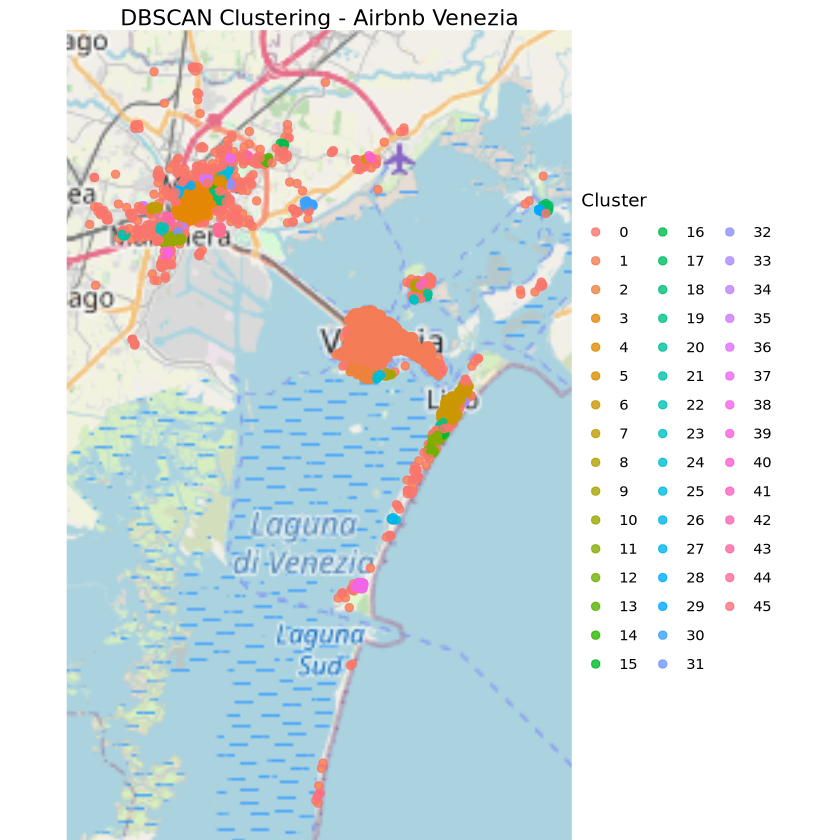

In [36]:
# Mappa di base il raggruppamento a cluster
ggplot() +
  annotation_map_tile("https://tile.openstreetmap.org/${z}/${x}/${y}.png") + # Mappa di base
  geom_point(
    data = as.data.frame(noise),
    aes(x = x, y = y),
    color = "yellow",
    size = 1,
    alpha = 0.8
  ) + # Rumore
  geom_point(
    data = as.data.frame(clusters),
    aes(x = x, y = y, color = as.factor(cluster)), # Colori diversi per cluster
    size = 2, # Dimensione maggiore per i cluster
    alpha = 0.8
  ) +
  scale_color_manual(
    values = scales::hue_pal()(length(unique(clusters$cluster))),
    name = "Cluster"
  ) + # Mappatura dei colori per cluster
  theme_void() +
  ggtitle("DBSCAN Clustering - Airbnb Venezia") +
  theme(plot.title = element_text(hjust = 0.5))



# Rappresentazione di poligoni

---

In [38]:
# URL del file GeoJSON
url_quartieri_venezia <- 'http://data.insideairbnb.com/italy/veneto/venice/2023-12-12/visualisations/neighbourhoods.geojson'

# Leggere il file GeoJSON
quartieri_venezia <- st_read(url_quartieri_venezia, quiet = TRUE)

# Correggere geometrie invalide nei poligoni
quartieri_venezia <- st_make_valid(quartieri_venezia)

# Trasformare le coordinate in EPSG:3857
quartieri_venezia_3857 <- st_transform(quartieri_venezia, crs = 3857)




Zoom: 10



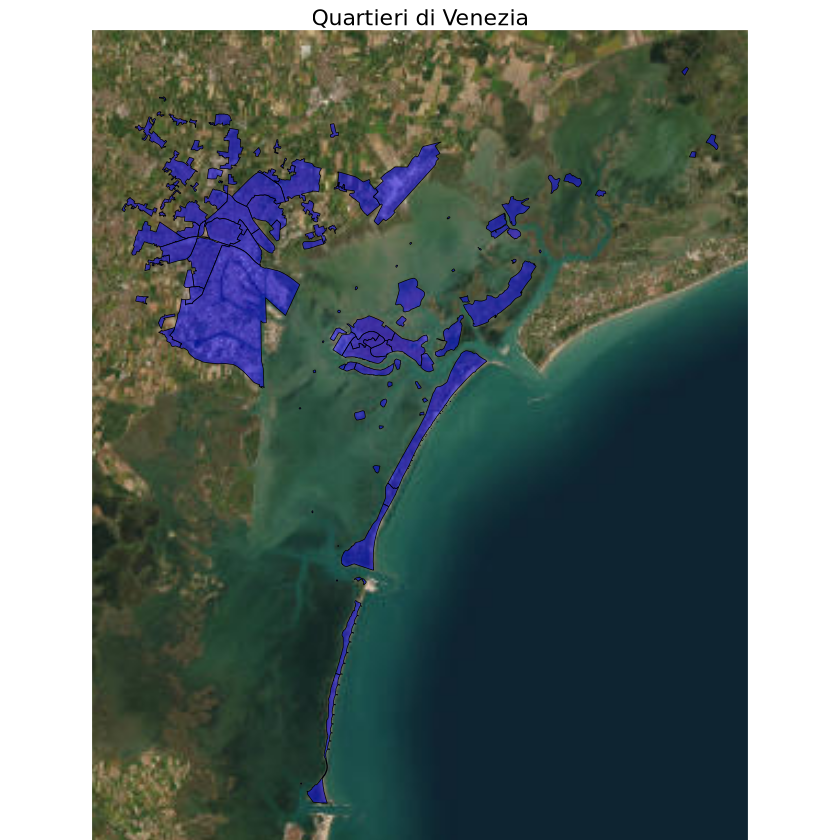

In [39]:
options(viewer = NULL)
# Creare la mappa con ggplot2
ggplot() +
  annotation_map_tile("https://services.arcgisonline.com/arcgis/rest/services/World_Imagery/MapServer/tile/${z}/${y}/${x}.jpg") + # Mappa di base Esri
  geom_sf(data = quartieri_venezia_3857, fill = "blue", alpha = 0.5, color = "black") + # Quartieri
  theme_void() + # Rimuovere assi
  ggtitle("Quartieri di Venezia") +
  theme(plot.title = element_text(hjust = 0.5))

Zoom: 10



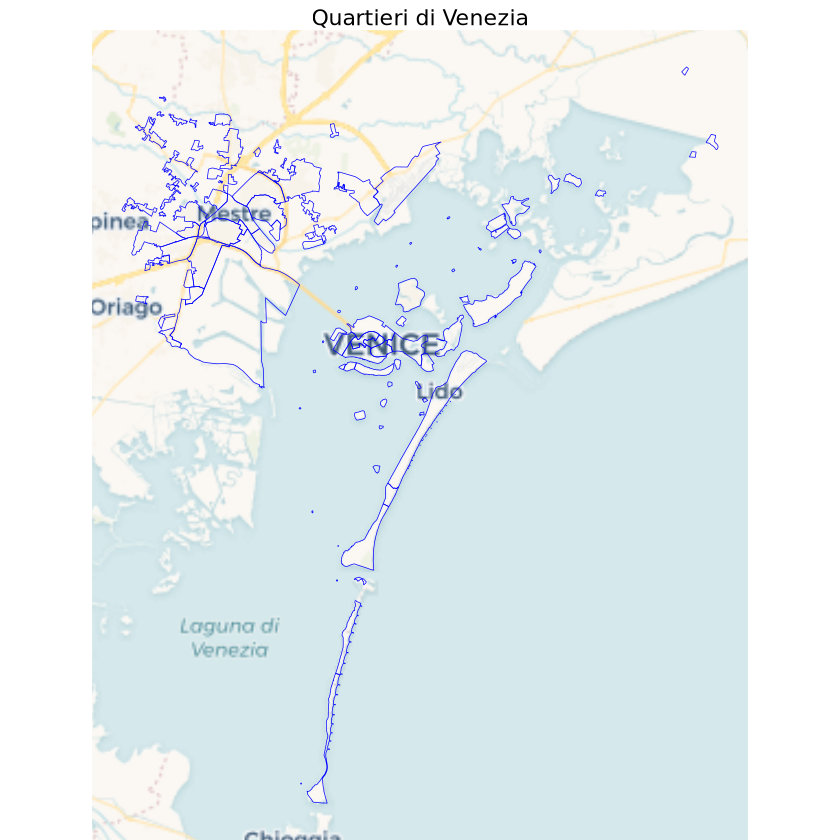

In [40]:
options(viewer = NULL)
# Creare la mappa con ggplot2
ggplot() +
  annotation_map_tile("https://cartodb-basemaps-a.global.ssl.fastly.net/rastertiles/voyager/${z}/${x}/${y}.png") + # Mappa di base CartoDB Voyager
  geom_sf(data = quartieri_venezia_3857, fill = NA, alpha = 0.7, color = "blue") + # Poligoni trasparenti con contorni blu
  theme_void() + # Rimuovere assi
  ggtitle("Quartieri di Venezia") +
  theme(plot.title = element_text(hjust = 0.5))

# Mappe coropletiche

Le mappe coropletiche svolgono un ruolo di primo piano nella data scienze geospaziale poiché ci consentono di visualizzare attributi o variabili non geografici su una mappa geografica.<br/>La parola coropleta deriva dalla radice "choro", che significa "regione". \
Poiché tali mappe coropletiche rappresentano dati a livello di regione e sono appropriate per dati di unità areali in cui ciascuna osservazione combina il valore di un attributo e una figura geometrica, solitamente un poligono.

fonte [Rey, S.J., D. Arribas-Bel e L.J. Wolf (2020) "Geographic Data Science with PySAL and the PyData Stack”](https://geographicdata.science/book/notebooks/05_choropleth.html)

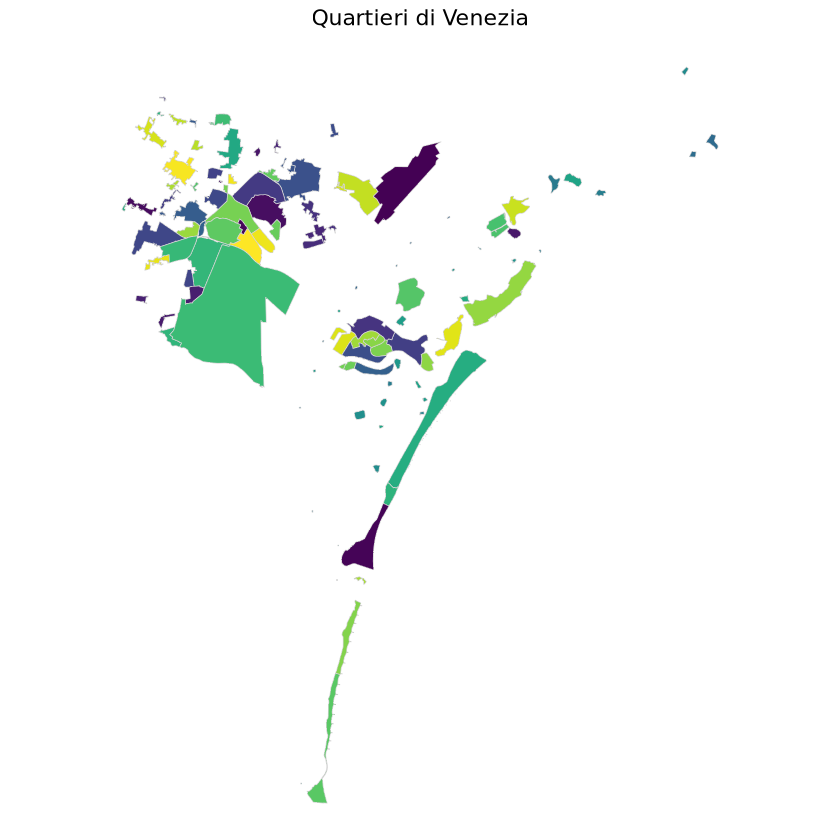

In [41]:
ggplot(data = quartieri_venezia) +
  geom_sf(aes(fill = as.factor(neighbourhood)), color = "lightgray") + # Poligoni colorati per quartiere
  scale_fill_viridis_d(name = "Quartieri")+ 
  theme_void() + # Rimuovere assi
  ggtitle("Quartieri di Venezia") +
  theme(
    plot.title = element_text(hjust = 0.5), # Titolo centrato
    legend.position = "none" # Rimuove la legenda
  )

In [42]:
ggsave("mappa_coropletica.png", width = 10, height = 7, dpi = 300)


In [43]:
# Creare un oggetto solo con la legenda
legenda <- ggplot(data = quartieri_venezia) +
  geom_sf(aes(fill = as.factor(neighbourhood)), color = "lightgray") + # Usare gli stessi colori
  scale_fill_viridis_d(name = "Quartieri") + # Gradiente discreto per i quartieri
  theme_void() + # Rimuovere elementi extra
  theme(
    legend.position = "bottom", # Posizionare la legenda sotto
    legend.key.width = unit(1, "cm"), # Larghezza delle chiavi
    legend.title = element_text(hjust = 0.5) # Centrare il titolo della legenda
  )


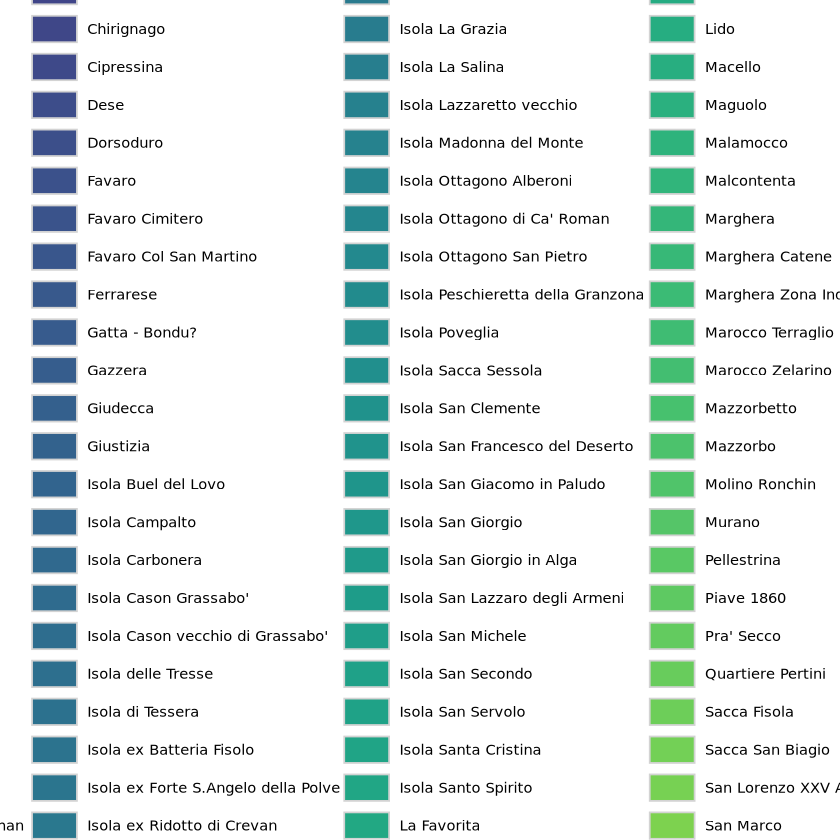

In [44]:
legenda

In [45]:
ggsave("mappa_coropletica_legenda.png", width = 10, height = 7, dpi = 300)


In [46]:
library(dplyr)

In [48]:
# Spatial join tra punti e poligoni
join <- st_join(geo_airbnb_venezia, quartieri_venezia, join = st_within)

# Conta i punti per ciascun poligono
totale_strutture <- join %>%
  group_by(neighbourhood.x) %>%
  summarise(totale_strutture = n()) %>%
  ungroup()

# Visualizza il risultato
print(totale_strutture)

Simple feature collection with 107 features and 2 fields
Geometry type: GEOMETRY
Dimension:     XY
Bounding box:  xmin: 12.183 ymin: 45.26956 xmax: 12.42034 ymax: 45.53675
Geodetic CRS:  WGS 84
# A tibble: 107 × 3
   neighbourhood.x                    totale_strutture                  geometry
   <chr>                                         <int>            <GEOMETRY [°]>
 1 Barbarigo, Lido de Venezia, Italy                 1 POINT (12.36555 45.41015)
 2 Burano Venezia, Veneto, Italy                     1 POINT (12.42034 45.48648)
 3 Burano, Veneto, Italy                             1 POINT (12.41899 45.48646)
 4 Burano, Venezia, Italy                            1 POINT (12.41632 45.48517)
 5 Cannaregio, Province of Venice, I…                2 MULTIPOINT ((12.32094 45…
 6 Cannaregio, Venezia , Italy                       1 POINT (12.33938 45.43871)
 7 Cannaregio, Venezia, Veneto, Italy                2 MULTIPOINT ((12.3338 45.…
 8 Cannaregio, Venice, Italy                         1 PO

In [49]:
# Ordinare totale_strutture in ordine decrescente
totale_strutture_sorted <- totale_strutture %>%
  arrange(desc(totale_strutture))

In [50]:
head(totale_strutture_sorted,4)

neighbourhood.x,totale_strutture,geometry
<chr>,<int>,<MULTIPOINT [°]>
"Venice, Veneto, Italy",4174,MULTIPOINT ((12.30209 45.27...
NA,3213,MULTIPOINT ((12.30184 45.27...
"Lido, Veneto, Italy",184,MULTIPOINT ((12.32238 45.34...
"Venice, Italy",85,MULTIPOINT ((12.41747 45.48...


In [51]:
library(tidyr)

In [52]:
# Rinomina la colonna di totale_strutture
totale_strutture <- totale_strutture %>%
  rename(neighbourhood = neighbourhood.x)

In [53]:
# Effettua il join
quartieri_venezia <- quartieri_venezia %>%
  left_join(st_drop_geometry(totale_strutture), by = "neighbourhood") %>%
  mutate(totale_strutture = replace_na(totale_strutture, 0))


In [54]:
quartieri_con_strutture <- quartieri_venezia %>%
  filter(totale_strutture > 0)

In [55]:
quartieri_con_strutture

neighbourhood,neighbourhood_group,totale_strutture,geometry
<chr>,<chr>,<int>,<GEOMETRY [°]>
